<a href="https://colab.research.google.com/github/KaustabKarmakar17/Model_Training_on_Algerian_forest_fires/blob/main/Algerian_Forest_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df= pd.read_csv('Algerian_forest_fires_dataset.csv')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,fire,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


##Dataset Cleaning.
####**The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.**

###**122 instances for each region.**

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (class)

So till 122th record belongs to the NorthEast of Algeria and the rest belongs
to Sidi Bel-abbes region

Now labelling needs to be done.

0: NorthEast Of Algeria

1: Siddi bel-abbes

In [ ]:
df.isnull().sum()

,0
day,1
month,2
year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


In [ ]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [ ]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,fire,0


In [ ]:
df["Region"]=df["Region"].astype(int)

In [ ]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,fire,0


In [ ]:
# Removing Null Values
df=df.dropna().reset_index(drop=True)
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [ ]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [ ]:
### Removing 122th row as it Serves as the headings of the other record
df=df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,fire,1


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [ ]:
df[["day","month","year","Temperature","RH","Ws"]]=df[["day","month","year","Temperature","RH","Ws"]].astype(int)
df[["Rain","FFMC",	"DMC",	"DC",	"ISI",	"BUI",	"FWI"]]=df[["Rain","FFMC",	"DMC",	"DC",	"ISI",	"BUI",	"FWI"]].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

# EDA

In [ ]:
df1=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [ ]:
df1=df1.drop(["day","month","year"],axis=1)
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df1['Classes'].value_counts()  ## Gives count of different values in a particular category

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
df1['Classes'] = np.where( df1['Classes'].str.contains('not fire'), 0, 1) ## Makes 0 and 1 in place of not fire and fire respectively

In [ ]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
df1.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [ ]:
df1['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [ ]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


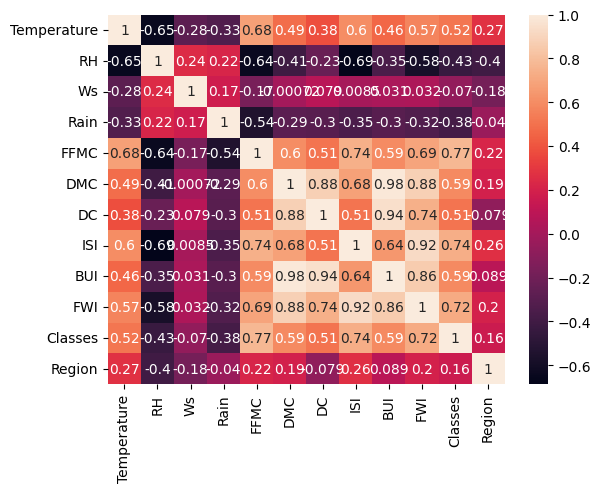

In [ ]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

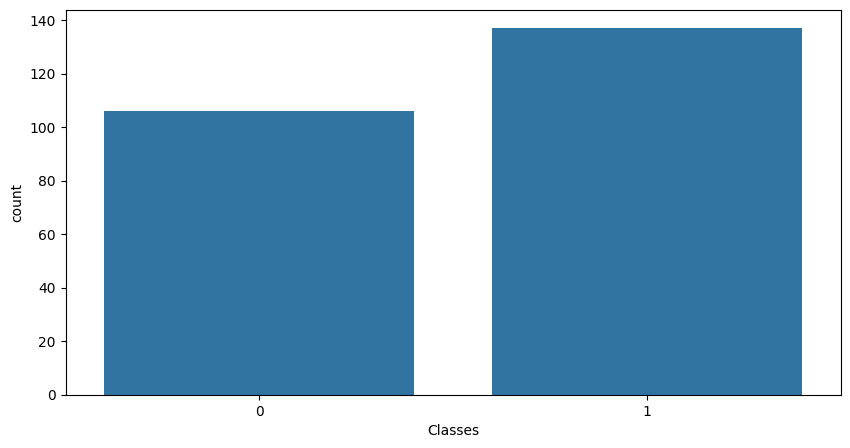

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Classes',data=df1)
plt.show()

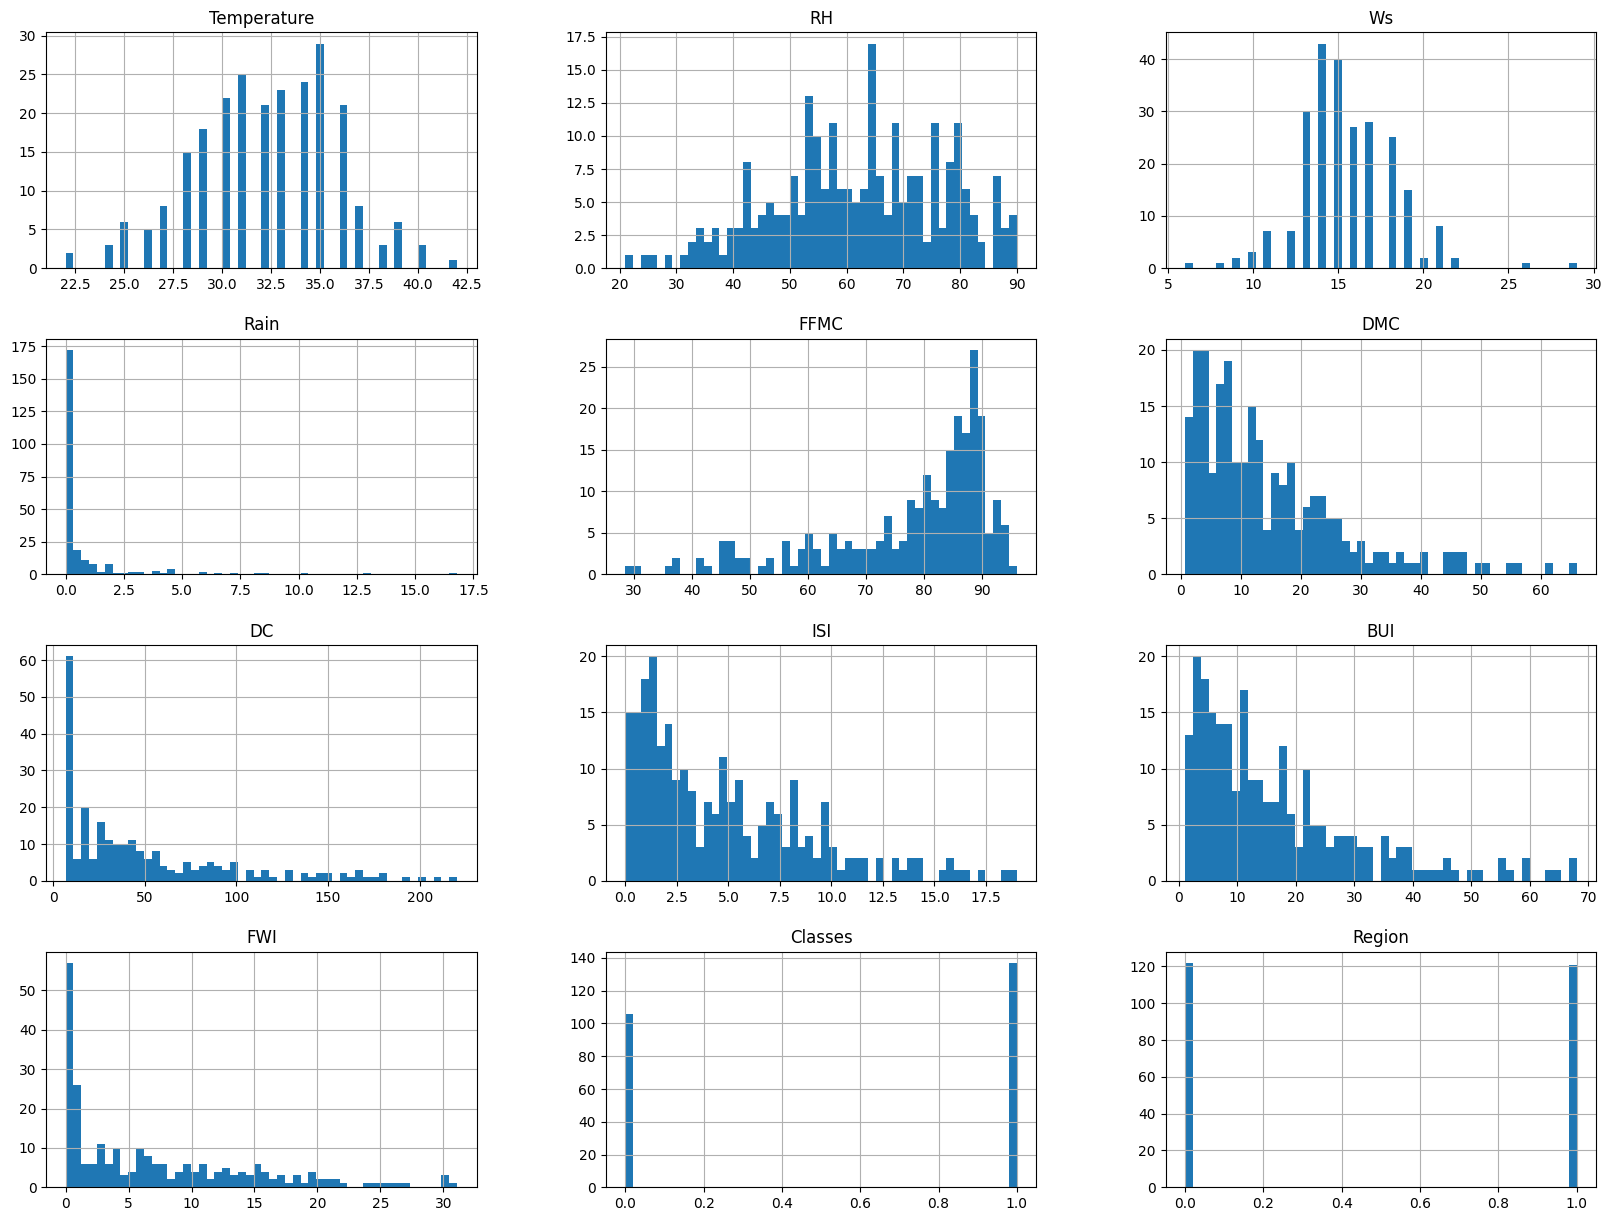

In [ ]:
df1.hist(bins=50,figsize=(20,15))
plt.show()

# Model Training with Cross Validation

Here our main aim is to predict Temperature by using other Numerical features

So, Temperature is our Target feature

And have used LassoCV for Cross Validation

In [ ]:
X=df1.drop("Temperature",axis=1)
Y=df1["Temperature"]

In [ ]:
X.head(2)

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [ ]:
Y.head(2)

,Temperature
0,29
1,29


In [ ]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((194, 11), (49, 11))

In [ ]:
X_train.corr()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
RH,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.600901,-0.454926,-0.408441
Ws,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,0.019499,-0.075322,-0.202357
Rain,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.328108,-0.378585,-0.057382
FFMC,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.707374,0.786012,0.254770
DMC,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.880473,0.606775,0.188980
DC,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.748819,0.538893,-0.083038
ISI,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.918762,0.740072,0.291889
BUI,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.858155,0.602102,0.090326
FWI,-0.600901,0.019499,-0.328108,0.707374,0.880473,0.748819,0.918762,0.858155,1.000000,0.728952,0.216451
Classes,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,0.728952,1.000000,0.196276


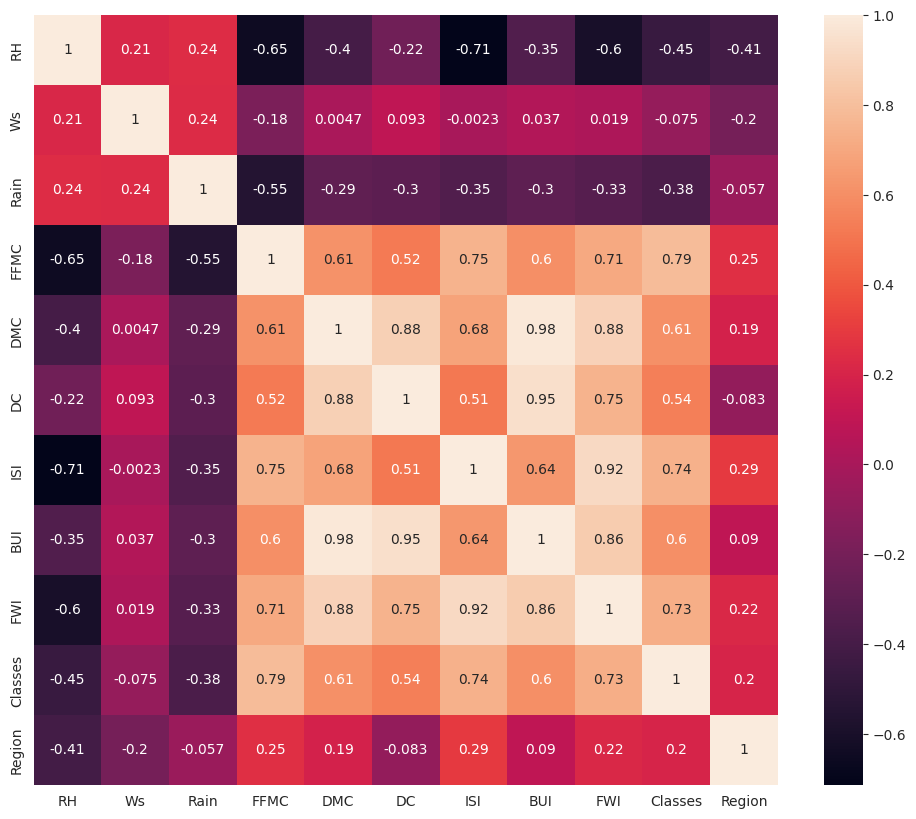

In [ ]:
## Checking for Collinearity
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [ ]:
## Standardisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.21321832,  1.28577038, -0.09206896, ..., -0.86275306,
        -1.14434427, -1.01036297],
       [-1.65484925,  0.14504117, -0.38015572, ...,  2.93741047,
         0.8738629 ,  0.98974332],
       [-1.25454906, -0.99568804, -0.14008342, ..., -0.2850255 ,
         0.8738629 ,  0.98974332],
       ...,
       [ 0.947102  ,  0.52528424,  3.0768854 , ..., -0.93978341,
        -1.14434427, -1.01036297],
       [-0.18708188,  0.14504117, -0.38015572, ...,  0.44676275,
         0.8738629 ,  0.98974332],
       [ 1.0138187 ,  2.04625653,  0.48410456, ..., -0.91410663,
        -1.14434427, -1.01036297]])

# **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
Y_pred=lin_reg.predict(X_test)
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,Y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

MAE: 2.2495453131562133
MSE: 7.490782752637681
RMSE: 2.7369294387392746
R2 Score: 0.39630204789597634


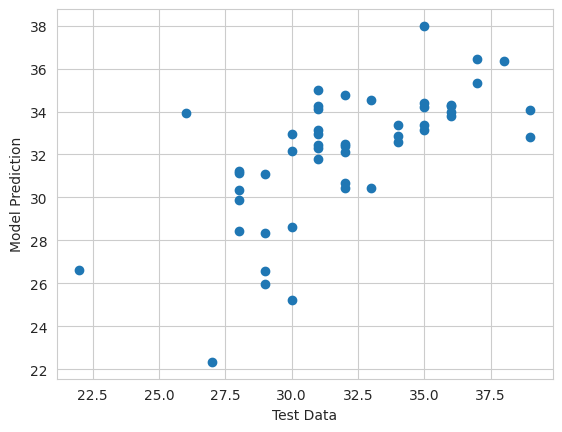

In [ ]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Test Data")
plt.ylabel("Model Prediction")
plt.show()

# **Lasso Reggresion**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lasso=Lasso()
lasso.fit(X_train,Y_train)
Y_pred=lasso.predict(X_test)
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,Y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

MAE: 2.2207357921436106
MSE: 7.100508218582119
RMSE: 2.6646778827059228
R2 Score: 0.42775509422611213


#  CV  with Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV ## Lasso Regression with Cross Validation
lasso=LassoCV(cv=10)  ## Does CV in 10 iterations
lasso.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5287436881984604, tolerance: 0.23954252873563214
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5861963164863937, tolerance: 0.23954252873563214
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5952541370741073, tolerance: 0.23954252873563214
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Conve

LassoCV(cv=10)

MAE: 2.1317469943992653
MSE: 6.675236308838315
RMSE: 2.583647868583936
R2 Score: 0.46202865274164895


Text(0, 0.5, 'Model Prediction')

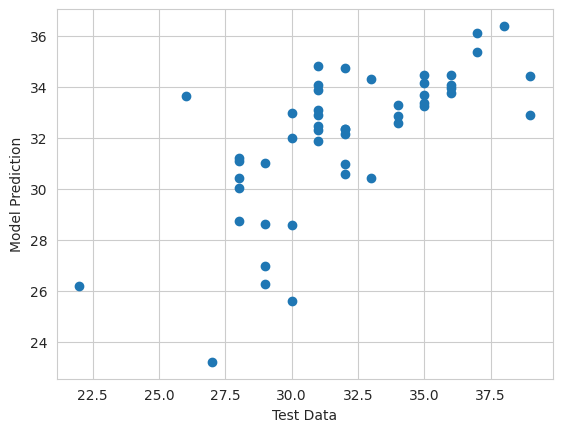

In [ ]:
Y_pred=lasso.predict(X_test)
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,Y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)
plt.scatter(Y_test,Y_pred)
plt.xlabel("Test Data")
plt.ylabel("Model Prediction")